In [1]:
from common import *
from matrix import *

# Matrix Factorization

In [3]:
def_matrices(globals(), ff)

In [ ]:
# Transforms

In [53]:
transnorm = QT(output_distribution='normal')
Ycnorm = Y * 0 + transnorm.fit_transform(Y)
Ycrnorm = (Ycnorm.T * 0 + transnorm.fit_transform(Ycnorm.T)).T
Yrnorm = (Y.T * 0 + transnorm.fit_transform(Y.T)).T
Yrcnorm = Yrnorm.T * 0 + transnorm.fit_transform(Yrnorm.T)

In [ ]:
# vanilla PCA

In [67]:
theY, theW = Yrnorm.T, W
theY = theY - theY.mean()
f = PCA(theY.shape[1])
Yf = f.fit_transform(theY)#, weights=theW)

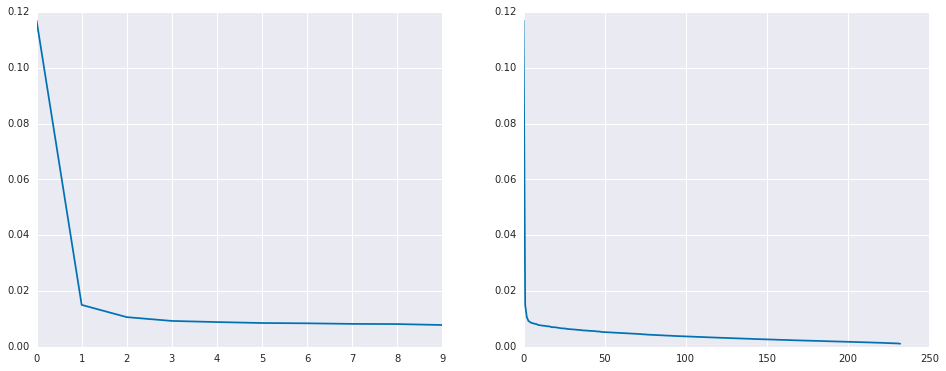

In [68]:
%matplotlib inline
canvas(16, 6)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(f.explained_variance_ratio_[:10]), ax1.plot(f.explained_variance_ratio_[:]);

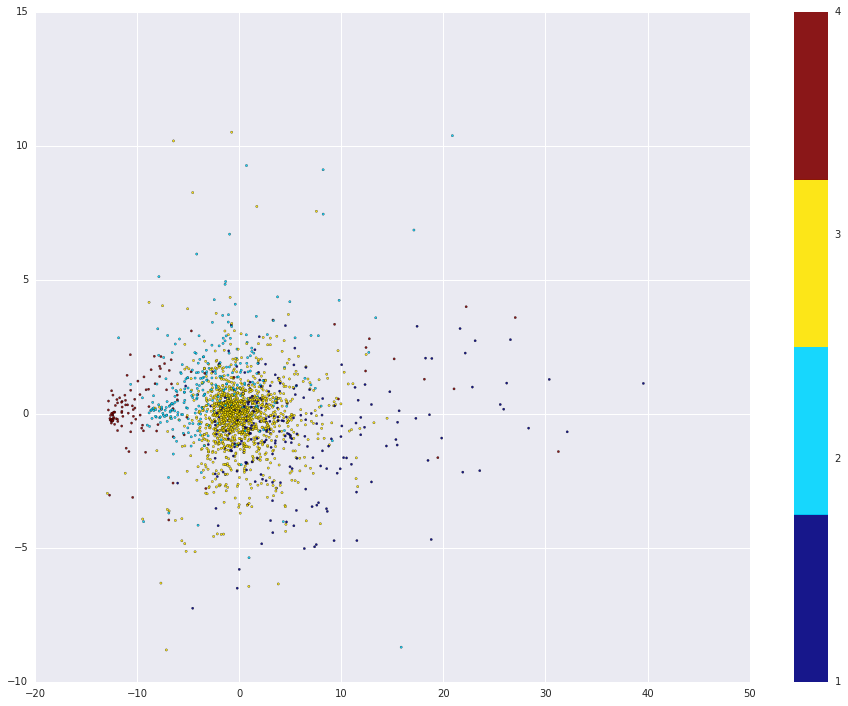

In [69]:
%matplotlib inline
canvas(16, 12)
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(Yf[:, 0], Yf[:, 2], s=5, alpha=.9, c=market, cmap=plt.get_cmap('jet', 4));
plt.colorbar(ticks=[1, 2, 3, 4]);

In [ ]:
# "just PCA"

In [259]:
theY, theW = Ynnorm.T, W
theY = theY - theY.mean()
f = MBSparsePCA(2, verbose=3, alpha=3, n_iter=1000)
Yf = f.fit_transform(theY)#, weights=theW)

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  34 (elapsed time:   0s,  0.0mn)
Iteration  68 (elapsed time:   0s,  0.0mn)
Iteration  102 (elapsed time:   0s,  0.0mn)
Iteration  136 (elapsed time:   0s,  0.0mn)
Iteration  170 (elapsed time:   0s,  0.0mn)
Iteration  204 (elapsed time:   0s,  0.0mn)
Iteration  238 (elapsed time:   0s,  0.0mn)
Iteration  272 (elapsed time:   0s,  0.0mn)
Iteration  306 (elapsed time:   0s,  0.0mn)
Iteration  340 (elapsed time:   0s,  0.0mn)
Iteration  374 (elapsed time:   0s,  0.0mn)
Iteration  408 (elapsed time:   0s,  0.0mn)
Iteration  442 (elapsed time:   0s,  0.0mn)
Iteration  476 (elapsed time:   0s,  0.0mn)
Iteration  510 (elapsed time:   0s,  0.0mn)
Iteration  544 (elapsed time:   0s,  0.0mn)
Iteration  578 (elapsed time:   0s,  0.0mn)
Iteration  612 (elapsed time:   0s,  0.0mn)
Iteration  646 (elapsed time:   0s,  0.0mn)
Iteration  680 (elapsed time:   0s,  0.0mn)
Iteration  714 (elapsed time:   0s,  0.0mn)
Iteration  748 (elapsed time:   0s,

In [ ]:
%matplotlib inline
canvas(16, 6)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(f.lambdas_[:10]), ax1.plot(f.lambdas_[:]);

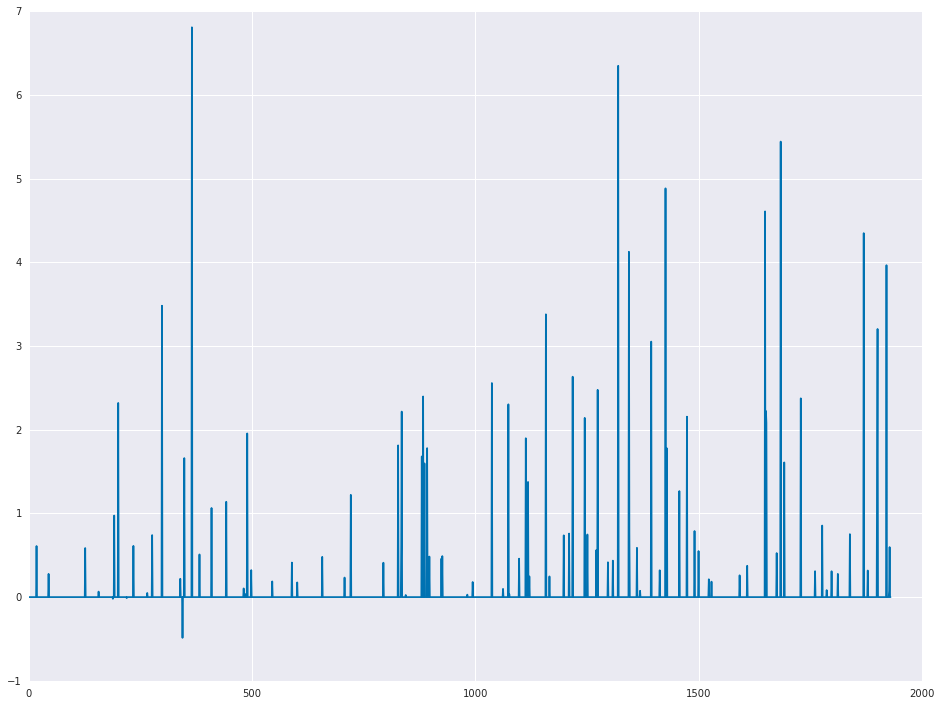

In [112]:
/plt.plot f.components_[0]

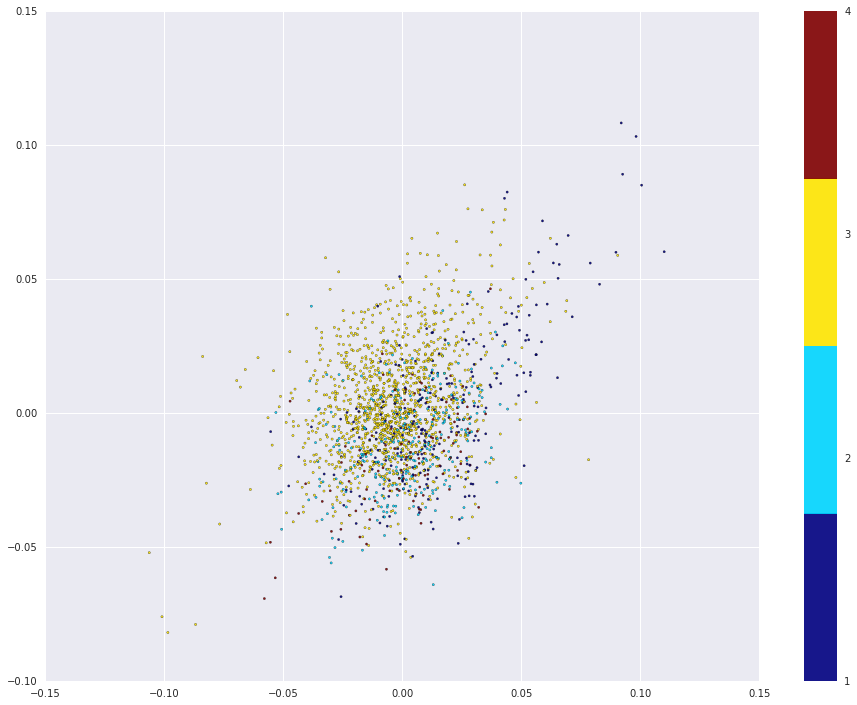

In [260]:
%matplotlib inline
canvas(16, 12)
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(Yf[:, 0], Yf[:, 1], s=5, alpha=.9, c=market, cmap=plt.get_cmap('jet', 4));
plt.colorbar(ticks=[1, 2, 3, 4]);

In [ ]:
# Factor Analysis

In [16]:
theY = Ynnorm
noise = [None]
for i in range(1, 70):
    print(i) if i % 10 == 0 else None
    theY = theY - theY.mean()
    f = FA(i)
    f = f.fit(theY)
    noise.append(f.noise_variance_.mean())

10
20
30
40
50
60


<IPython.core.display.Javascript object>


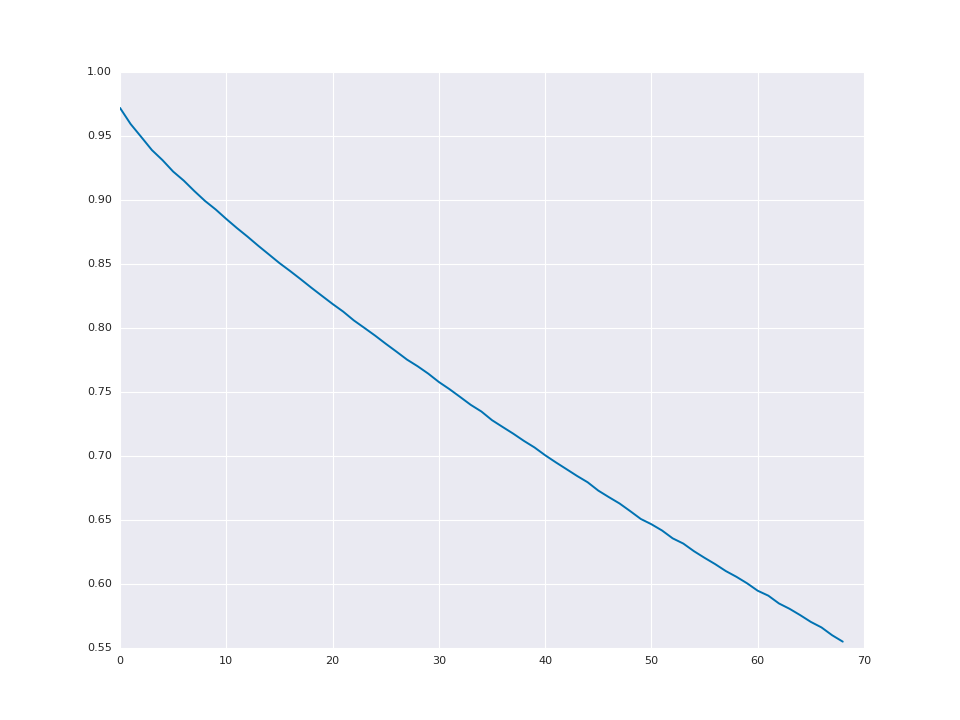

In [20]:
plt.plot(noise[1:]);

In [ ]:
# PCA outliers when I didn't remove stocks with not enough valid dates

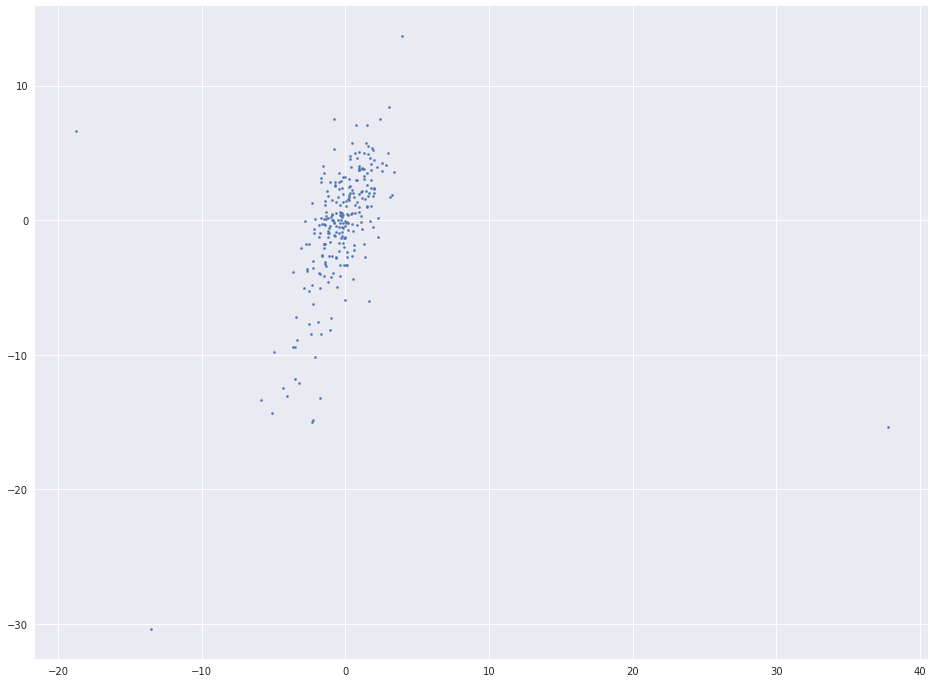

In [201]:
h = plt.scatter(Yf[:, 0], Yf[:, 1], s=5)

In [213]:
(
    (Yf[:, 0] > 30).nonzero() +
    (Yf[:, 0] < -15).nonzero() +
    (Yf[:, 1] < -30).nonzero() +
    (Yf[:, 1] > 10).nonzero() +
())

(array([257]), array([256]), array([253]), array([127]))

In [ ]:
# How to do ZCA using sklearn's PCA
# c.f. Michael Eickenberg on Google https://groups.google.com/forum/#!topic/theano-users/_63ggUdWeEI
pca = PCA(whiten=True)
transformed = pca.fit_transform(data)
pca.whiten = False
zca = pca.inverse_transform(transformed)